In [188]:
import pandas as pd
import glob
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore", category=FutureWarning)

files = glob.glob('./server_results/gpt_ablation/*.csv')



In [189]:




def plot_bars(ax, df, x, y1, y2, datasetname, legend=False):


    # Create the figure and axes
    

    print(datasetname)

    # Restructure the data for side-by-side bars
    melted_df = df.melt(
        id_vars=[x],
        value_vars=[y1, y2],
        var_name="Metric",
        value_name="Value"
    )

    # Define the order for the categorical x-axis
    order = df.groupby(x)[y2].mean().sort_values(ascending=False).index

    # Plot the bars
    sns.barplot(
        data=melted_df,
        x=x,
        y="Value",
        hue="Metric",
        ax=ax,
        palette=sns.color_palette("Set2"),  # Use a better palette
        order=order
    )

    # Set labels and title
    ax.set_xlabel(None)
    ax.set_ylabel("Score", fontsize=12)
    ax.set_title(f"{datasetname}", fontsize=14, y=1.02)

    # Customize ticks
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    if legend:
        ax.legend(
            title=None,
            fontsize=12,
            loc='lower center',
            bbox_to_anchor=(0.5, -0.5),  # Position legend outside plot
            ncol=len(df[y2].unique()),  # Arrange legend in a single row
            frameon=False
        )
    else:
        ax.get_legend().remove()

  





In [190]:
def fix_df_names(df):
    df = df.rename(columns={'All_RecallAtSizeofGroundTruth': 'Recall@GT'})
    df = df.rename(columns={'mrr': 'MRR'})

    
    df['method'] = df['method'].apply(lambda x: x.replace('MatchMaker', 'MM '))
    df['method'] = df['method'].str.replace('_5', ' (k=5)')
    df['method'] = df['method'].str.replace('_10', ' (k=10)')
    df['method'] = df['method'].str.replace('_20', ' (k=20)')

    return df

In [191]:

all_dfs_list=[]
datasetnames =[]
for file in files:
    datasetname = file.split('_')[0]
    datasetname = file.split('/')[-1].split('_')[0]    
    datasetnames.append(datasetname)
    df = pd.read_csv(file)

    df = fix_df_names(df)
    
    all_dfs_list.append(df)

    if datasetname=='GDC':
        gdc_df = df

all_dfs = pd.concat(all_dfs_list)

    

Results for Musicians
Musicians
Results for Magellan
Magellan


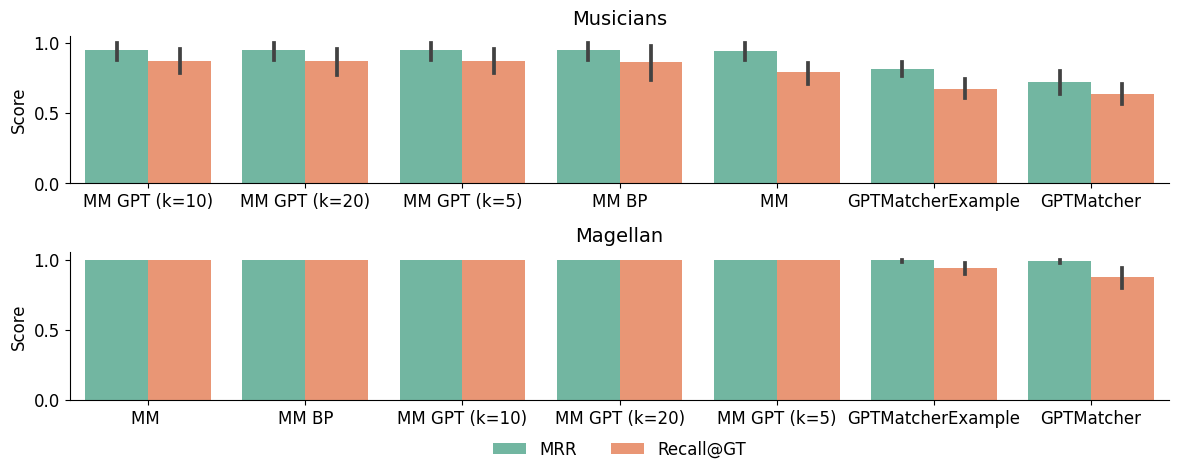

In [192]:

fig, axis = plt.subplots(len(all_dfs_list), 1, figsize=(12, 5))

for i,df in enumerate(all_dfs_list):
    datasetname =datasetnames[i]
    print('Results for', datasetname)
    ax =  axis[i]
    
    plot_bars(ax, df, 'method', 'MRR', 'Recall@GT', datasetname, legend=(i == len(all_dfs_list)-1))
    

  # Remove the top and right spines


# Save the figure as a high-resolution PDF
fig.savefig("figures/gpt_ablation.pdf", format='pdf', dpi=300)

sns.despine()
plt.tight_layout()
plt.show()